## STAT 5261 Project

MUQING WEN - mw3821

## Step 2: Save each company's data as a separate CSV file

In [1]:
import os
import pandas as pd

def load_csvs_to_dict(folder_name):
    data_dict = {}
    
    # Ensure the folder exists
    if not os.path.exists(folder_name):
        print(f"Error: Folder '{folder_name}' does not exist.")
        return data_dict

    # Iterate through the files in the folder
    for file in os.listdir(folder_name):
        if file.endswith(".csv"):  # Ensure only CSV files are processed
            file_path = os.path.join(folder_name, file)
            df_name = os.path.splitext(file)[0]  # Extract name without extension
            data_dict[df_name] = pd.read_csv(file_path, index_col=0)  # Read CSV with index
            
    return data_dict

# Test Code
folder = "2018_to_2024"
data_frames1 = load_csvs_to_dict(folder)

# Print the names of the DataFrames
print("Loaded DataFrames:", list(data_frames1.keys()))

# Display the first 5 rows and first 10 columns of each DataFrame
for name, df in data_frames1.items():
    print(f"\nDataFrame: {name}")
    display(df.iloc[:5, :5])  # Display first 5 rows and first 5 columns

Loaded DataFrames: ['Close', 'High', 'Low', 'Open', 'Volume']

DataFrame: Close


China (SSE Composite Index)  France (CAC 40)  UK (FTSE 100)  \
Date                                                                      
2018-01-04                  3385.709961      5413.689941    7695.899902   
2018-01-05                  3391.750000      5470.750000    7724.200195   
2018-01-09                  3413.899902      5523.939941    7731.000000   
2018-01-10                  3421.833984      5504.680176    7748.500000   
2018-01-11                  3425.344971      5488.549805    7762.899902   

            Germany (DAX)  US (S&P 500)  
Date                                     
2018-01-04   13167.889648   2723.989990  
2018-01-05   13319.639648   2743.149902  
2018-01-09   13385.589844   2751.290039  
2018-01-10   13281.339844   2748.229980  
2018-01-11   13202.900391   2767.560059


DataFrame: High


China (SSE Composite Index)  France (CAC 40)  UK (FTSE 100)  \
Date                                                                      
2018-01-04                  3392.825928      5430.720215    7702.500000   
2018-01-05                  3402.069092      5470.750000    7727.700195   
2018-01-09                  3417.228027      5525.669922    7733.100098   
2018-01-10                  3430.214111      5529.299805    7756.100098   
2018-01-11                  3426.482910      5516.589844    7769.000000   

            Germany (DAX)  US (S&P 500)  
Date                                     
2018-01-04   13208.349609   2729.290039  
2018-01-05   13332.799805   2743.449951  
2018-01-09   13425.019531   2759.139893  
2018-01-10   13377.879883   2750.800049  
2018-01-11   13298.650391   2767.560059


DataFrame: Low


China (SSE Composite Index)  France (CAC 40)  UK (FTSE 100)  \
Date                                                                      
2018-01-04                  3365.294922      5360.009766    7671.100098   
2018-01-05                  3380.245117      5422.779785    7689.799805   
2018-01-09                  3403.586914      5491.910156    7696.500000   
2018-01-10                  3398.842041      5487.560059    7716.200195   
2018-01-11                  3405.638916      5478.970215    7734.600098   

            Germany (DAX)  US (S&P 500)  
Date                                     
2018-01-04   13062.669922   2719.070068  
2018-01-05   13219.110352   2727.919922  
2018-01-09   13361.219727   2747.860107  
2018-01-10   13227.570312   2736.060059  
2018-01-11   13151.839844   2752.780029


DataFrame: Open


China (SSE Composite Index)  France (CAC 40)  UK (FTSE 100)  \
Date                                                                      
2018-01-04                  3371.000000      5360.009766    7671.100098   
2018-01-05                  3386.464111      5424.160156    7695.899902   
2018-01-09                  3406.112061      5491.910156    7696.500000   
2018-01-10                  3414.113037      5518.319824    7731.000000   
2018-01-11                  3415.584961      5514.089844    7748.500000   

            Germany (DAX)  US (S&P 500)  
Date                                     
2018-01-04   13065.980469   2719.310059  
2018-01-05   13219.110352   2731.330078  
2018-01-09   13383.259766   2751.149902  
2018-01-10   13355.280273   2745.550049  
2018-01-11   13281.200195   2752.969971


DataFrame: Volume


China (SSE Composite Index)  France (CAC 40)  UK (FTSE 100)  \
Date                                                                      
2018-01-04                     207000.0       92583500.0    705864000.0   
2018-01-05                     213100.0       76275800.0    636035700.0   
2018-01-09                     191500.0       78844900.0    709674500.0   
2018-01-10                     209100.0       96478300.0    861758600.0   
2018-01-11                     173800.0       83544400.0    982791800.0   

            Germany (DAX)  US (S&P 500)  
Date                                     
2018-01-04    101199400.0  3.697340e+09  
2018-01-05    112555000.0  3.239280e+09  
2018-01-09     94770400.0  3.467460e+09  
2018-01-10    120334900.0  3.579900e+09  
2018-01-11    110577300.0  3.645690e+09

In [2]:
import pandas as pd

def combine_columns_from_df_dict(df_dict, n=0):
    """
    Combine the ith column from each DataFrame in df_dict into a new DataFrame.
    
    Parameters:
    - df_dict (dict of pd.DataFrame): Dictionary of dataframes with the same shape.
    - n (int): Number of columns to iterate over. If 0, use all columns.

    Returns:
    - result_dict (dict of pd.DataFrame): Dictionary with column names as keys and
      DataFrames with ith columns from all input DataFrames as values.
    """
    # Assume all dataframes have the same shape and columns
    first_df = next(iter(df_dict.values()))
    total_cols = len(first_df.columns)
    n = total_cols if n == 0 else min(n, total_cols)

    result_dict = {}

    for i in range(n):
        col_name = first_df.columns[i]
        combined_df = pd.DataFrame({
            key: df.iloc[:, i] for key, df in df_dict.items()
        })
        result_dict[col_name] = combined_df

    return result_dict

data_frames2 = combine_columns_from_df_dict(data_frames1, n=10)

for name, df in data_frames2.items():
    print(f"\nDataFrame: {name}")
    display(df.iloc[:3, :5])  # Display first 5 rows and first 5 columns


DataFrame: China (SSE Composite Index)


Close         High          Low         Open    Volume
Date                                                                    
2018-01-04  3385.709961  3392.825928  3365.294922  3371.000000  207000.0
2018-01-05  3391.750000  3402.069092  3380.245117  3386.464111  213100.0
2018-01-09  3413.899902  3417.228027  3403.586914  3406.112061  191500.0


DataFrame: France (CAC 40)


Close         High          Low         Open      Volume
Date                                                                      
2018-01-04  5413.689941  5430.720215  5360.009766  5360.009766  92583500.0
2018-01-05  5470.750000  5470.750000  5422.779785  5424.160156  76275800.0
2018-01-09  5523.939941  5525.669922  5491.910156  5491.910156  78844900.0


DataFrame: UK (FTSE 100)


Close         High          Low         Open       Volume
Date                                                                       
2018-01-04  7695.899902  7702.500000  7671.100098  7671.100098  705864000.0
2018-01-05  7724.200195  7727.700195  7689.799805  7695.899902  636035700.0
2018-01-09  7731.000000  7733.100098  7696.500000  7696.500000  709674500.0


DataFrame: Germany (DAX)


Close          High           Low          Open  \
Date                                                                 
2018-01-04  13167.889648  13208.349609  13062.669922  13065.980469   
2018-01-05  13319.639648  13332.799805  13219.110352  13219.110352   
2018-01-09  13385.589844  13425.019531  13361.219727  13383.259766   

                 Volume  
Date                     
2018-01-04  101199400.0  
2018-01-05  112555000.0  
2018-01-09   94770400.0


DataFrame: US (S&P 500)


Close         High          Low         Open        Volume
Date                                                                        
2018-01-04  2723.989990  2729.290039  2719.070068  2719.310059  3.697340e+09
2018-01-05  2743.149902  2743.449951  2727.919922  2731.330078  3.239280e+09
2018-01-09  2751.290039  2759.139893  2747.860107  2751.149902  3.467460e+09


DataFrame: Canada (S&P/TSX Composite)


Close          High           Low          Open  \
Date                                                                 
2018-01-04  16412.900391  16421.400391  16344.900391  16385.400391   
2018-01-05  16349.400391  16370.299805  16309.900391  16362.599609   
2018-01-09  16319.200195  16358.200195  16309.799805  16351.400391   

                 Volume  
Date                     
2018-01-04  195975200.0  
2018-01-05  160313100.0  
2018-01-09  236911700.0


DataFrame: Korea (KOSPI)


Close        High          Low         Open    Volume
Date                                                                   
2018-01-04  2466.459961  2502.50000  2466.449951  2502.500000  333800.0
2018-01-05  2497.520020  2497.52002  2475.510010  2476.850098  308800.0
2018-01-09  2510.229980  2524.72998  2498.409912  2510.729980  374300.0


DataFrame: Japan (Nikkei 225)


Close          High           Low          Open  \
Date                                                                 
2018-01-04  23506.330078  23506.330078  23065.199219  23073.730469   
2018-01-05  23714.529297  23730.470703  23520.519531  23643.000000   
2018-01-09  23849.990234  23952.609375  23789.029297  23948.970703   

                 Volume  
Date                     
2018-01-04  102200000.0  
2018-01-05  101900000.0  
2018-01-09   94100000.0


DataFrame: India (Nifty 50)


Close          High           Low          Open    Volume
Date                                                                        
2018-01-04  10504.799805  10513.000000  10441.450195  10469.400391  174900.0
2018-01-05  10558.849609  10566.099609  10520.099609  10534.250000  180900.0
2018-01-09  10637.000000  10659.150391  10603.599609  10645.099609  205000.0

In [3]:
import re

def save_df_dict_to_csv(df_dict, folder_name):
    """
    Save each DataFrame in df_dict to a CSV file in the specified folder.
    
    Parameters:
    - df_dict (dict of pd.DataFrame): Dictionary with DataFrames as values.
    - folder_name (str): Folder where CSV files will be saved.
    """
    # Create the folder if it doesn't exist
    os.makedirs(folder_name, exist_ok=True)
    
    # Save each DataFrame as a CSV file
    for name, df in df_dict.items():
        # Replace illegal characters in filename
        safe_name = re.sub(r'[\\/:"*?<>|]', '-', name)
        file_path = os.path.join(folder_name, f"{safe_name}.csv")
        df.to_csv(file_path, index=True)


save_df_dict_to_csv(data_frames2, "2018_to_2024_by_companies")

In [4]:
# Test Code
folder = "2018_to_2024_by_companies"
data_frames3 = load_csvs_to_dict(folder)

# Print the names of the DataFrames
print("Loaded DataFrames:", list(data_frames3.keys()))

# Display the first 5 rows and first 10 columns of each DataFrame
for name, df in data_frames3.items():
    print(f"\nDataFrame: {name}")
    pd.to_datetime(df.index)
    display(df.iloc[:5, :5])  # Display first 5 rows and first 5 columns

Loaded DataFrames: ['Canada (S&P-TSX Composite)', 'China (SSE Composite Index)', 'France (CAC 40)', 'Germany (DAX)', 'India (Nifty 50)', 'Japan (Nikkei 225)', 'Korea (KOSPI)', 'UK (FTSE 100)', 'US (S&P 500)']

DataFrame: Canada (S&P-TSX Composite)


Close          High           Low          Open  \
Date                                                                 
2018-01-04  16412.900391  16421.400391  16344.900391  16385.400391   
2018-01-05  16349.400391  16370.299805  16309.900391  16362.599609   
2018-01-09  16319.200195  16358.200195  16309.799805  16351.400391   
2018-01-10  16248.000000  16341.099609  16229.299805  16314.200195   
2018-01-11  16286.900391  16301.400391  16244.900391  16276.200195   

                 Volume  
Date                     
2018-01-04  195975200.0  
2018-01-05  160313100.0  
2018-01-09  236911700.0  
2018-01-10  243953300.0  
2018-01-11  231161200.0


DataFrame: China (SSE Composite Index)


Close         High          Low         Open    Volume
Date                                                                    
2018-01-04  3385.709961  3392.825928  3365.294922  3371.000000  207000.0
2018-01-05  3391.750000  3402.069092  3380.245117  3386.464111  213100.0
2018-01-09  3413.899902  3417.228027  3403.586914  3406.112061  191500.0
2018-01-10  3421.833984  3430.214111  3398.842041  3414.113037  209100.0
2018-01-11  3425.344971  3426.482910  3405.638916  3415.584961  173800.0


DataFrame: France (CAC 40)


Close         High          Low         Open      Volume
Date                                                                      
2018-01-04  5413.689941  5430.720215  5360.009766  5360.009766  92583500.0
2018-01-05  5470.750000  5470.750000  5422.779785  5424.160156  76275800.0
2018-01-09  5523.939941  5525.669922  5491.910156  5491.910156  78844900.0
2018-01-10  5504.680176  5529.299805  5487.560059  5518.319824  96478300.0
2018-01-11  5488.549805  5516.589844  5478.970215  5514.089844  83544400.0


DataFrame: Germany (DAX)


Close          High           Low          Open  \
Date                                                                 
2018-01-04  13167.889648  13208.349609  13062.669922  13065.980469   
2018-01-05  13319.639648  13332.799805  13219.110352  13219.110352   
2018-01-09  13385.589844  13425.019531  13361.219727  13383.259766   
2018-01-10  13281.339844  13377.879883  13227.570312  13355.280273   
2018-01-11  13202.900391  13298.650391  13151.839844  13281.200195   

                 Volume  
Date                     
2018-01-04  101199400.0  
2018-01-05  112555000.0  
2018-01-09   94770400.0  
2018-01-10  120334900.0  
2018-01-11  110577300.0


DataFrame: India (Nifty 50)


Close          High           Low          Open    Volume
Date                                                                        
2018-01-04  10504.799805  10513.000000  10441.450195  10469.400391  174900.0
2018-01-05  10558.849609  10566.099609  10520.099609  10534.250000  180900.0
2018-01-09  10637.000000  10659.150391  10603.599609  10645.099609  205000.0
2018-01-10  10632.200195  10655.500000  10592.700195  10652.049805  176400.0
2018-01-11  10651.200195  10664.599609  10612.349609  10637.049805  153800.0


DataFrame: Japan (Nikkei 225)


Close          High           Low          Open  \
Date                                                                 
2018-01-04  23506.330078  23506.330078  23065.199219  23073.730469   
2018-01-05  23714.529297  23730.470703  23520.519531  23643.000000   
2018-01-09  23849.990234  23952.609375  23789.029297  23948.970703   
2018-01-10  23788.199219  23864.759766  23755.449219  23832.810547   
2018-01-11  23710.429688  23734.970703  23601.839844  23656.390625   

                 Volume  
Date                     
2018-01-04  102200000.0  
2018-01-05  101900000.0  
2018-01-09   94100000.0  
2018-01-10   88800000.0  
2018-01-11   83700000.0


DataFrame: Korea (KOSPI)


Close         High          Low         Open    Volume
Date                                                                    
2018-01-04  2466.459961  2502.500000  2466.449951  2502.500000  333800.0
2018-01-05  2497.520020  2497.520020  2475.510010  2476.850098  308800.0
2018-01-09  2510.229980  2524.729980  2498.409912  2510.729980  374300.0
2018-01-10  2499.750000  2516.820068  2493.979980  2516.330078  444000.0
2018-01-11  2487.909912  2502.520020  2483.820068  2496.860107  444300.0


DataFrame: UK (FTSE 100)


Close         High          Low         Open       Volume
Date                                                                       
2018-01-04  7695.899902  7702.500000  7671.100098  7671.100098  705864000.0
2018-01-05  7724.200195  7727.700195  7689.799805  7695.899902  636035700.0
2018-01-09  7731.000000  7733.100098  7696.500000  7696.500000  709674500.0
2018-01-10  7748.500000  7756.100098  7716.200195  7731.000000  861758600.0
2018-01-11  7762.899902  7769.000000  7734.600098  7748.500000  982791800.0


DataFrame: US (S&P 500)


Close         High          Low         Open        Volume
Date                                                                        
2018-01-04  2723.989990  2729.290039  2719.070068  2719.310059  3.697340e+09
2018-01-05  2743.149902  2743.449951  2727.919922  2731.330078  3.239280e+09
2018-01-09  2751.290039  2759.139893  2747.860107  2751.149902  3.467460e+09
2018-01-10  2748.229980  2750.800049  2736.060059  2745.550049  3.579900e+09
2018-01-11  2767.560059  2767.560059  2752.780029  2752.969971  3.645690e+09

In [5]:
index_name_list = data_frames3.keys()
print(index_name_list)

dict_keys(['Canada (S&P-TSX Composite)', 'China (SSE Composite Index)', 'France (CAC 40)', 'Germany (DAX)', 'India (Nifty 50)', 'Japan (Nikkei 225)', 'Korea (KOSPI)', 'UK (FTSE 100)', 'US (S&P 500)'])


In [6]:
single_index_df = data_frames3['US (S&P 500)']

single_index_df.index = pd.to_datetime(single_index_df.index)
print(single_index_df.index)

DatetimeIndex(['2018-01-04', '2018-01-05', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12', '2018-01-16', '2018-01-17',
               '2018-01-18', '2018-01-19',
               ...
               '2024-12-12', '2024-12-13', '2024-12-16', '2024-12-17',
               '2024-12-18', '2024-12-19', '2024-12-20', '2024-12-23',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=1392, freq=None)


### Step 3: Visualize Original Data For a Single Index

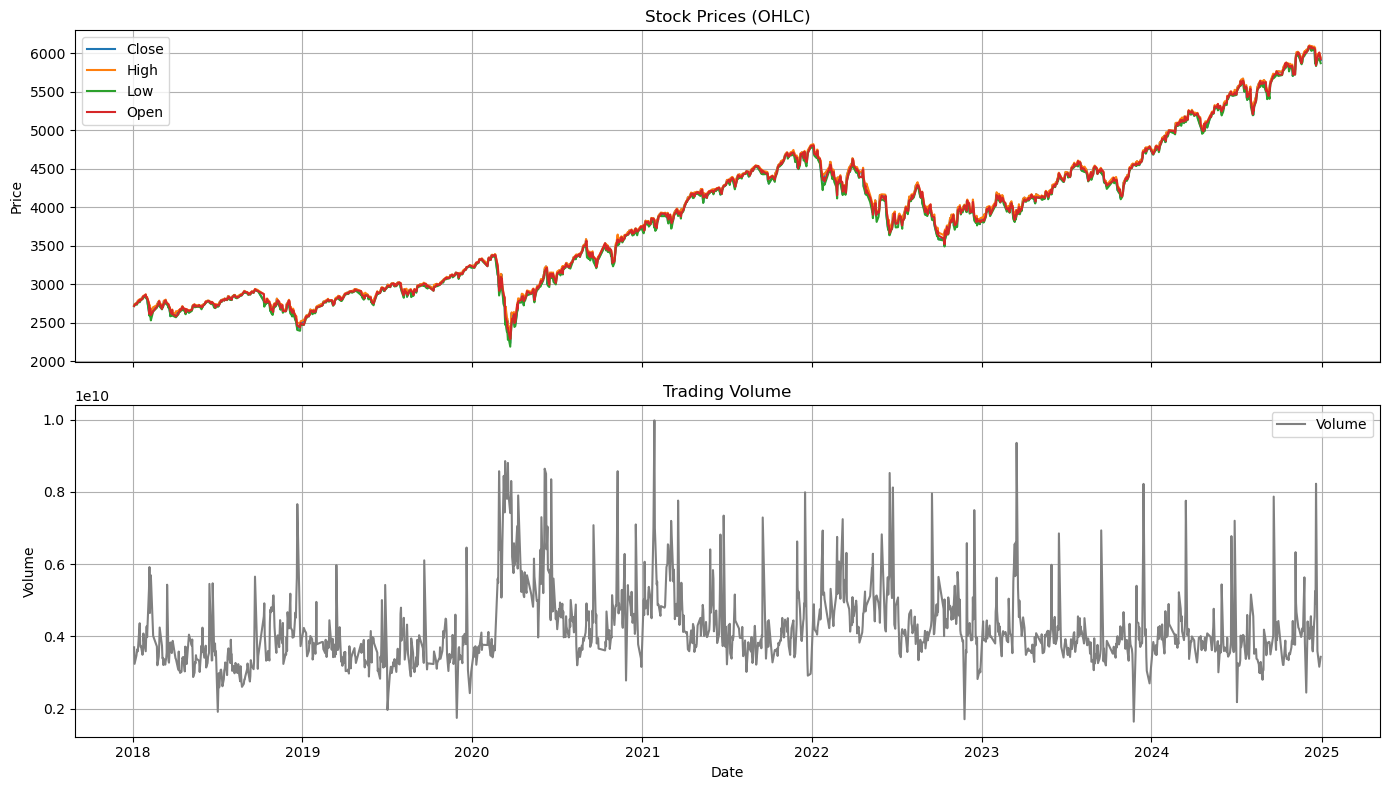

In [7]:
import matplotlib.pyplot as plt

def plot_stock_data(df):
    """
    Plots OHLC data and Volume data from a stock DataFrame.

    Parameters:
    - df (pd.DataFrame): A DataFrame with columns ["Close", "High", "Low", "Open", "Volume"]
                         and datetime index.
    """
    fig, ax1 = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

    # Plot Close, High, Low, Open
    ax1[0].plot(df.index, df["Close"], label="Close")
    ax1[0].plot(df.index, df["High"], label="High")
    ax1[0].plot(df.index, df["Low"], label="Low")
    ax1[0].plot(df.index, df["Open"], label="Open")
    ax1[0].set_ylabel("Price")
    ax1[0].set_title("Stock Prices (OHLC)")
    ax1[0].legend()
    ax1[0].grid(True)

    # Plot Volume
    ax1[1].plot(df.index, df["Volume"], color='gray', label="Volume")
    ax1[1].set_ylabel("Volume")
    ax1[1].set_title("Trading Volume")
    ax1[1].legend()
    ax1[1].grid(True)

    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()

plot_stock_data(single_index_df)

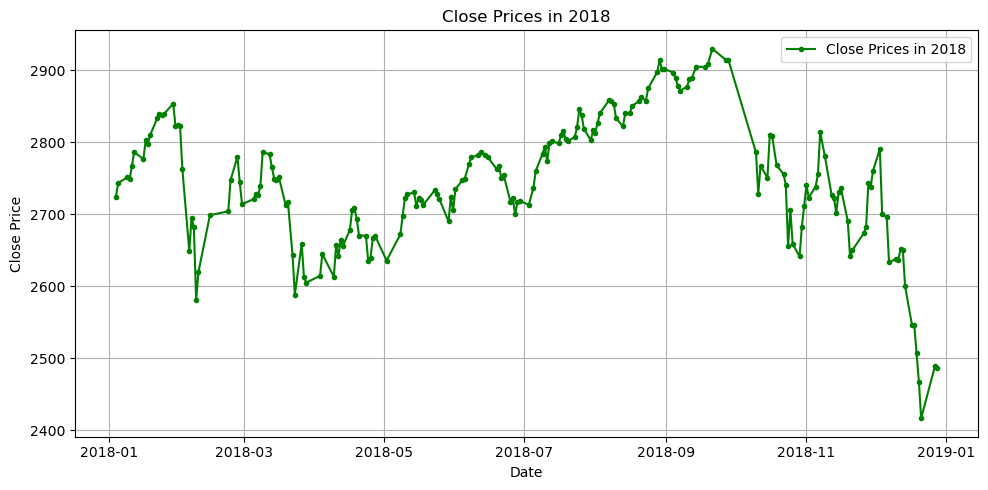

In [8]:
import pandas as pd

def filter_close_by_year(df, year):
    """
    Filters the 'Close' column of a DataFrame for the specified year.

    Parameters:
    - df (pd.DataFrame): DataFrame with a DateTime index and a 'Close' column.
    - year (str): A string representing the year to filter by (e.g., '2018').

    Returns:
    - pd.Series: Filtered 'Close' values for the specified year.
    """
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("DataFrame index must be a DateTimeIndex.")

    try:
        year_int = int(year)
    except ValueError:
        raise ValueError(f"Invalid year: {year}. Must be a 4-digit number string.")

    return df[df.index.year == year_int]["Close"]

# Test the function
year = "2018"
filtered_close = filter_close_by_year(single_index_df, year)

# Plot the result
plt.figure(figsize=(10, 5))
plt.plot(filtered_close.index, filtered_close.values, color="green", marker='.', label=f"Close Prices in {year}")
plt.title(f"Close Prices in {year}")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
type(filtered_close.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [10]:
def find_extrema_points(series, window_size):
    """
    Finds indices where the middle value of each window is equal to the max or min.

    Parameters:
    - series (pd.Series): Time series data with a DateTimeIndex.
    - window_size (int): Size of each sliding window.

    Returns:
    - (list, list): Tuple of two lists containing the indices of local maxima and minima.
    """
    if not isinstance(series.index, pd.DatetimeIndex):
        raise ValueError("The input series must have a DateTimeIndex.")
    if window_size < 1:
        raise ValueError("Window size must be at least 1.")

    max_indices = []
    min_indices = []

    for i in range(0, len(series) - window_size + 1):
        window = series.iloc[i:i + window_size]
        mid_idx = i + window_size // 2  # choose first middle value if even
        mid_value = series.iloc[mid_idx]
        window_max = window.max()
        window_min = window.min()
        mid_timestamp = series.index[mid_idx]

        if mid_value == window_max:
            max_indices.append(mid_timestamp)
        elif mid_value == window_min:
            min_indices.append(mid_timestamp)

    return max_indices, min_indices

# Test the function
year = "2023"
close_df = filter_close_by_year(single_index_df, year)

close_df = single_index_df['Close']

window_size = 50
max_pts, min_pts = find_extrema_points(close_df, window_size)

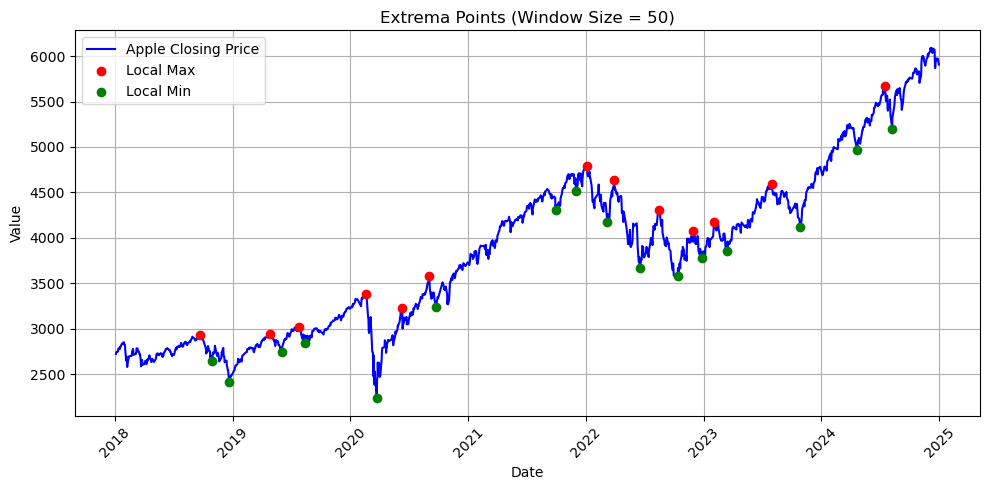

In [11]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(close_df.index, close_df.values, label="Apple Closing Price", color='blue')
plt.scatter(max_pts, close_df[max_pts], color='red', label='Local Max', zorder=5)
plt.scatter(min_pts, close_df[min_pts], color='green', label='Local Min', zorder=5)

title = f"Extrema Points (Window Size = {window_size})"
plt.title(title)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(title, dpi=300, bbox_inches='tight')
plt.show()

## Step 4: Calculate Technical Indicators
### Compute Volatility Based on Daily Returns

In [12]:
folder = "2018_to_2024_by_companies"
data_frames4 = load_csvs_to_dict(folder)

single_index_df = data_frames4['US (S&P 500)']

single_index_df.index = pd.to_datetime(single_index_df.index)
print(single_index_df.index)

DatetimeIndex(['2018-01-04', '2018-01-05', '2018-01-09', '2018-01-10',
               '2018-01-11', '2018-01-12', '2018-01-16', '2018-01-17',
               '2018-01-18', '2018-01-19',
               ...
               '2024-12-12', '2024-12-13', '2024-12-16', '2024-12-17',
               '2024-12-18', '2024-12-19', '2024-12-20', '2024-12-23',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=1392, freq=None)


In [41]:
import numpy as np

def add_daily_return(df):
    """
    Adds a column 'return (n=1)' to the DataFrame which contains the daily log returns based on 'Close' prices.
    """
    if 'Close' not in df.columns:
        raise ValueError("Missing 'Close' column")
    df['return (n=1)'] = np.log(df['Close'] / df['Close'].shift(1))
    return df

def add_volatility(df, n):
    """
    Adds a column 'volatility (n={n})' to the DataFrame based on the rolling standard deviation
    of the daily returns over a window size of n.
    """
    if 'Close' not in df.columns:
        print("Warning: 'Close' column not found. Skipping return calculation.")
        return df
    if 'return (n=1)' not in df.columns:
        df = add_daily_return(df)  # Ensure daily return exists

    col_name = f"volatility (n={n})"
    df[col_name] = df['return (n=1)'].rolling(window=n).std()/(n**0.5)
    return df

# Test daily return
single_index_df = add_daily_return(single_index_df)

# Test volatility over 3-day window
single_index_df = add_volatility(single_index_df, n=10)

# To check the result
print(single_index_df)

                  Close         High          Low         Open        Volume  \
Date                                                                           
2018-02-06  2695.139893  2701.040039  2593.070068  2614.780029  5.917350e+09   
2018-02-07  2681.659912  2727.669922  2681.330078  2690.949951  4.646300e+09   
2018-02-08  2581.000000  2685.270020  2580.560059  2685.010010  5.333840e+09   
2018-02-09  2619.550049  2638.669922  2532.689941  2601.780029  5.690110e+09   
2018-02-14  2698.629883  2702.100098  2648.870117  2651.209961  4.011940e+09   
...                 ...          ...          ...          ...           ...   
2024-12-19  5867.080078  5935.520020  5866.069824  5912.709961  4.896880e+09   
2024-12-20  5930.850098  5982.060059  5832.299805  5842.000000  8.223220e+09   
2024-12-23  5974.069824  5978.250000  5902.569824  5940.250000  3.593280e+09   
2024-12-27  5970.839844  6006.169922  5932.950195  6006.169922  3.159610e+09   
2024-12-30  5906.939941  5940.790039  58

In [42]:
single_index_df = single_index_df.dropna()
single_index_df.head()

Close         High          Low         Open        Volume  \
Date                                                                           
2018-03-05  2720.939941  2728.090088  2675.750000  2681.060059  3.733640e+09   
2018-03-06  2728.120117  2732.080078  2711.260010  2730.179932  3.389030e+09   
2018-03-07  2726.800049  2730.600098  2701.739990  2710.179932  3.406690e+09   
2018-03-08  2738.969971  2740.449951  2722.649902  2732.750000  3.206040e+09   
2018-03-09  2786.570068  2786.570068  2751.540039  2752.909912  3.376870e+09   

            return (n=1)  volatility (n=20)  volatility (n=10)  
Date                                                            
2018-03-05      0.002616           0.003927           0.006030  
2018-03-06      0.002635           0.003929           0.005994  
2018-03-07     -0.000484           0.003929           0.004080  
2018-03-08      0.004453           0.003940           0.003946  
2018-03-09      0.017230           0.004042           0.003179

In [43]:
single_index_df.shape

(1362, 8)

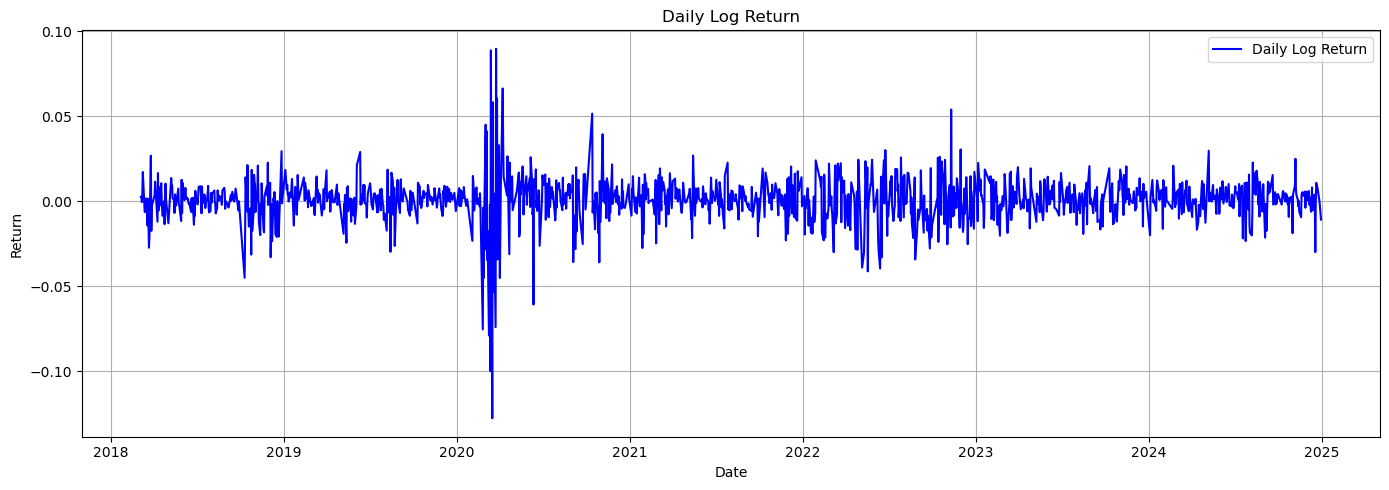

In [44]:
import matplotlib.pyplot as plt

# Plot daily return
plt.figure(figsize=(14, 5))
plt.plot(single_index_df.index, single_index_df['return (n=1)'], label='Daily Log Return', color='blue')
plt.title("Daily Log Return")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

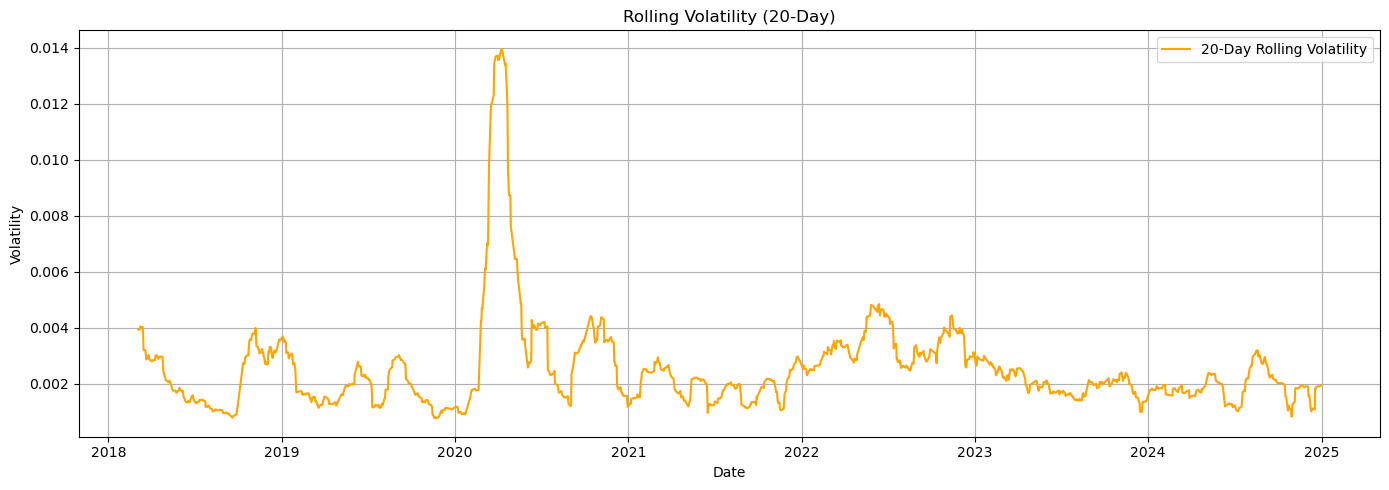

In [45]:
# Plot rolling volatility (example: 20-day window)
plt.figure(figsize=(14, 5))
plt.plot(single_index_df.index, single_index_df['volatility (n=20)'], label='20-Day Rolling Volatility', color='orange')
plt.title("Rolling Volatility (20-Day)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Step 5 --- Create Pipeline to Add Technical Indicators

In [46]:
folder = "2018_to_2024"
data_frames1 = load_csvs_to_dict(folder)
data_frames2 = combine_columns_from_df_dict(data_frames1, n=10)

folder2 = "2018_to_2024_by_companies"
save_df_dict_to_csv(data_frames2, folder2)

In [47]:
import os
import pandas as pd
import numpy as np

def process_csv_files(folder_name, function_list):
    """
    Open a folder and loop through all CSV files inside it.
    For each file, read the CSV into a DataFrame, apply each function in function_list,
    and save the modified DataFrame back to the same file.
    
    Each function in function_list should take a DataFrame as input and return a modified DataFrame.
    """
    if not os.path.isdir(folder_name):
        print(f"The folder '{folder_name}' does not exist.")
        return

    for filename in os.listdir(folder_name):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_name, filename)
            # print(file_path)
            try:
                df = pd.read_csv(file_path)
                for func in function_list:
                    df = func(df)
                df = df.dropna()
                df.to_csv(file_path, index=False)
                print(f"Updated '{filename}' — shape: {df.shape}")
            except Exception as e:
                print(f"Failed to process '{filename}': {e}")



function_list = [
    add_daily_return,
    lambda df: add_volatility(df, n=10)  # use a lambda if your function takes extra parameters
]

folder2 = "2018_to_2024_by_companies"
process_csv_files(folder2, function_list)

Updated 'Canada (S&P-TSX Composite).csv' — shape: (1382, 8)
Updated 'China (SSE Composite Index).csv' — shape: (1382, 8)
Updated 'France (CAC 40).csv' — shape: (1382, 8)
Updated 'Germany (DAX).csv' — shape: (1382, 8)
Updated 'India (Nifty 50).csv' — shape: (1382, 8)
Updated 'Japan (Nikkei 225).csv' — shape: (1382, 8)
Updated 'Korea (KOSPI).csv' — shape: (1382, 8)
Updated 'UK (FTSE 100).csv' — shape: (1382, 8)
Updated 'US (S&P 500).csv' — shape: (1382, 8)


## Split Train and Test Data

In [49]:
folder = "2018_to_2024_by_companies"
data_frames5 = load_csvs_to_dict(folder)

single_index_df = data_frames5['US (S&P 500)']

single_index_df.index = pd.to_datetime(single_index_df.index)
print(single_index_df.index)

DatetimeIndex(['2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-05',
               ...
               '2024-12-12', '2024-12-13', '2024-12-16', '2024-12-17',
               '2024-12-18', '2024-12-19', '2024-12-20', '2024-12-23',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=1382, freq=None)


In [50]:
single_index_df.head(5)

Close         High          Low         Open        Volume  \
Date                                                                           
2018-01-22  2832.969971  2833.030029  2808.120117  2809.159912  3.489480e+09   
2018-01-23  2839.129883  2842.239990  2830.590088  2835.050049  3.541140e+09   
2018-01-24  2837.540039  2852.969971  2824.810059  2845.419922  4.079270e+09   
2018-01-25  2839.250000  2848.560059  2830.939941  2846.239990  3.873100e+09   
2018-01-29  2853.530029  2870.620117  2851.479980  2867.229980  3.587420e+09   

            return (n=1)  volatility (n=10)  
Date                                         
2018-01-22      0.008034           0.001439  
2018-01-23      0.002172           0.001404  
2018-01-24     -0.000560           0.001460  
2018-01-25      0.000602           0.001415  
2018-01-29      0.005017           0.001370

In [51]:
def split_time_series(df, test_size=0.2, split_date=None):
    """
    Splits a time series DataFrame into train and test sets.

    Parameters:
    - df (pd.DataFrame): Time series DataFrame with date-based rows.
    - test_size (float): Fraction of data to use for testing (ignored if split_date is provided).
    - split_date (str or pd.Timestamp): Optional. Split point as a date (e.g., '2022-01-01').

    Returns:
    - train_df (pd.DataFrame): Training set
    - test_df (pd.DataFrame): Testing set
    """

    # Ensure index is sorted
    df = df.sort_index()

    if split_date is not None:
        train_df = df[df.index < split_date]
        test_df = df[df.index >= split_date]
    else:
        split_point = int(len(df) * (1 - test_size))
        train_df = df.iloc[:split_point]
        test_df = df.iloc[split_point:]

    print(f"Train shape: {train_df.shape}, Test shape: {test_df.shape}")
    return train_df, test_df

# Assume df has date index
single_index_df.index = pd.to_datetime(single_index_df.index)

# OR use a specific split date
train_df, test_df = split_time_series(single_index_df, split_date="2021-01-01")
print(train_df.shape, test_df.shape)

# 80/20 split
train_df, test_df = split_time_series(single_index_df, test_size=0.2)
print(train_df.shape, test_df.shape)

Train shape: (584, 7), Test shape: (798, 7)
(584, 7) (798, 7)
Train shape: (1105, 7), Test shape: (277, 7)
(1105, 7) (277, 7)


## Prepare Data for LSTM

In [52]:
min_max_1 = (single_index_df.min(), single_index_df.max())
min_max_1[0], min_max_1[1]

(Close                2.237400e+03
 High                 2.300730e+03
 Low                  2.191860e+03
 Open                 2.290710e+03
 Volume               1.639500e+09
 return (n=1)        -1.276522e-01
 volatility (n=10)    8.180134e-04
 dtype: float64,
 Close                6.090270e+03
 High                 6.099970e+03
 Low                  6.079980e+03
 Open                 6.089030e+03
 Volume               9.976520e+09
 return (n=1)         8.968323e-02
 volatility (n=10)    2.529143e-02
 dtype: float64)

In [54]:
import numpy as np

def prepare_data_for_lstm(df, window_size, target, period, min_max=None):
    """
    Splits a DataFrame into overlapping windows of a given size.

    Parameters:
    - df (pd.DataFrame): Input DataFrame of shape (n, m)
    - window_size (int): Number of rows per window

    Returns:
    - result (list of np.ndarray): List of arrays, each of shape (window_size, m)
    """
    assert window_size > period, 'window_size need to be greater than perdiction period'
    print("Original DataFrame shape:", df.shape)
    
    input_list = []
    output_list = []

    col_min = 0
    col_range = 1
    if min_max is not None:
        col_min = min_max[0]
        col_max = min_max[1]
        col_range = col_max - col_min
    # print(col_range)
    # print(col_min)
    
    for i in range(len(df) - window_size + 1):
        input_rows = df.iloc[i:i + window_size - period]
        input_rows = (input_rows - col_min) / col_range
        target_row = df.iloc[i+window_size-1 : i+window_size]
        target_row = (target_row - col_min) / col_range
        
        target_val = target_row[target]
        
        input_rows = input_rows.to_numpy()
        input_list.append(input_rows)
        output_list.append(target_val)
    
    input_array = np.array(input_list)
    output_array = np.array(output_list)
    
    
    return input_array, output_array

# Dummy data
# df = pd.DataFrame(np.random.rand(10, 3), columns=['A', 'B', 'C'])

# Apply function with window size 4
lstm_input, lstm_output = prepare_data_for_lstm(single_index_df, window_size=40, target='volatility (n=10)', period=10)
print("Final result array shape:", lstm_input.shape, lstm_output.shape)

Original DataFrame shape: (1382, 7)
Final result array shape: (1343, 30, 7) (1343, 1)


In [55]:
lstm_train_input, lstm_train_output = prepare_data_for_lstm(train_df, window_size=40, target='volatility (n=10)', period=10, min_max=min_max_1)
print("Final result array shape:", lstm_train_input.shape, lstm_train_output.shape)

lstm_test_input, lstm_test_output = prepare_data_for_lstm(test_df, window_size=40, target='volatility (n=10)', period=10, min_max=min_max_1)
print("Final result array shape:", lstm_test_input.shape, lstm_test_output.shape)

Original DataFrame shape: (1105, 7)
Final result array shape: (1066, 30, 7) (1066, 1)
Original DataFrame shape: (277, 7)
Final result array shape: (238, 30, 7) (238, 1)


### Prepare Data for Regular Neural Network / Most other models

In [57]:
import numpy as np

def prepare_data_for_regular_model(df, window_size, target, period):
    """
    Splits a DataFrame into overlapping windows of a given size.

    Parameters:
    - df (pd.DataFrame): Input DataFrame of shape (n, m)
    - window_size (int): Number of rows per window

    Returns:
    - result (list of np.ndarray): List of arrays, each of shape (window_size, m)
    """
    assert window_size > period, 'window_size need to be greater than perdiction period'
    print("Original DataFrame shape:", df.shape)
    
    input_list = []
    output_list = []
    
    for i in range(len(df) - window_size + 1):
        input_rows = df.iloc[i:i + window_size - period]
        target_row = df.iloc[i+window_size-1 : i+window_size]
        
        target_val = target_row[target]
        
        input_rows = input_rows.to_numpy()
        flat_array = input_rows.flatten()
        input_list.append(flat_array)
        output_list.append(target_val)
    
    input_array = np.array(input_list)
    output_array = np.array(output_list)
    
    
    return input_array, output_array

# Dummy data
# df = pd.DataFrame(np.random.rand(10, 3), columns=['A', 'B', 'C'])

# Apply function with window size 4
regular_train_input, regular_train_output = prepare_data_for_regular_model(train_df, window_size=40, target='volatility (n=10)', period=1)
print("Final result array shape:", regular_train_input.shape, regular_train_output.shape)

Original DataFrame shape: (1105, 7)
Final result array shape: (1066, 273) (1066, 1)


In [58]:
regular_test_input, regular_test_output = prepare_data_for_regular_model(test_df, window_size=40, target='volatility (n=10)', period=1)
print("Final result array shape:", regular_test_input.shape, regular_test_output.shape)

Original DataFrame shape: (277, 7)
Final result array shape: (238, 273) (238, 1)


## Build LSTM Model

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

lstm_model = Sequential([
    LSTM(units=128, return_sequences=True, input_shape=(35, 7)),  # First LSTM layer
    Dropout(0.2),  # Dropout to prevent overfitting
    LSTM(units=64, return_sequences=False),  # Second LSTM layer
    Dropout(0.2),
    Dense(units=25),  # Fully connected layer
    Dense(units=1)  # Output layer (predicting next day's spot price)
])

# Compile the model
lstm_model.compile(optimizer="adam", loss="mean_squared_error")

# Model Summary
lstm_model.summary()

C:\Users\wenmu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 35, 128)             │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 35, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120,691 (471.45 KB)

 Trainable params: 120,691 (471.45 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Train the model
lstm_history = lstm_model.fit(lstm_train_input, lstm_train_output, epochs=50, batch_size=20)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0059
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0057
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0042
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0065
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0043
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0039
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0041
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0051
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0037
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0047
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0043
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0040
Epoch 13/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0037
Epoch 14/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0043
Epoch 15/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0035
Epoc

In [64]:
# Evaluate the model
test_loss = lstm_model.evaluate(lstm_test_input, lstm_test_output)
print(f"Test Loss: {test_loss:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0039
Test Loss: 0.0056


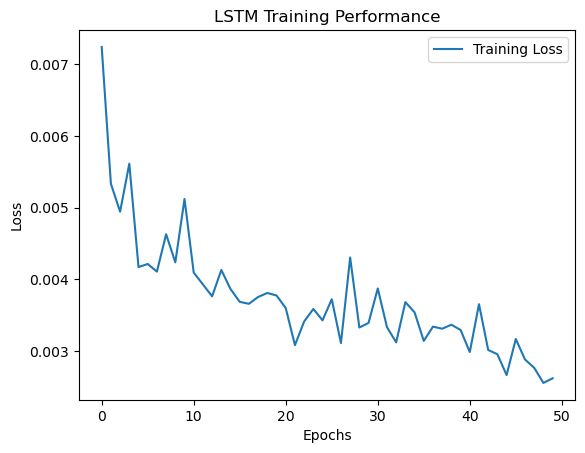

In [65]:
import matplotlib.pyplot as plt

plt.plot(lstm_history.history['loss'], label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("LSTM Training Performance")
plt.savefig("LSTM train history.png", dpi=300, bbox_inches='tight')
plt.show()

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


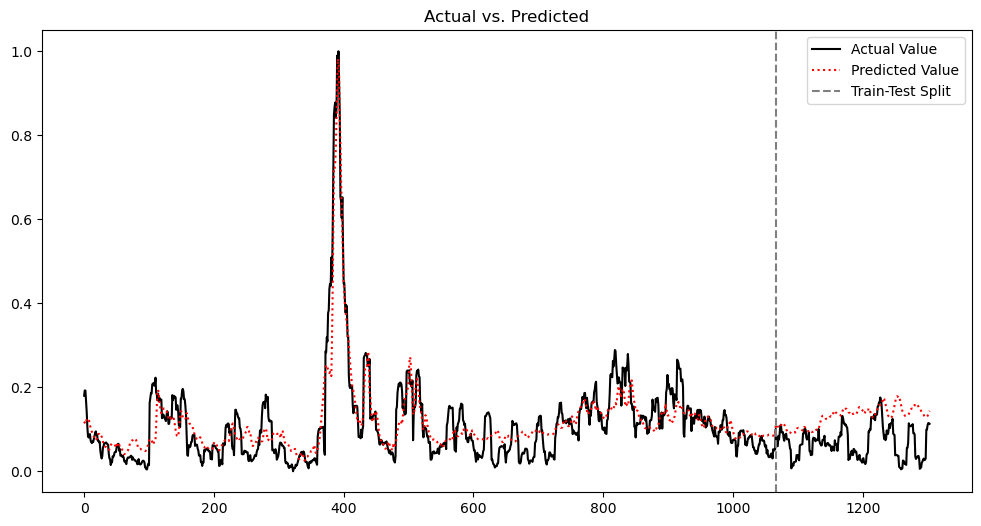

In [66]:
def visualize_predictions(model, X_train, y_train, X_test, y_test, df, title=""):
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Create a combined actual spot price series
    actual_spot_prices = np.concatenate([y_train, y_test])
    predicted_spot_prices = np.concatenate([y_train_pred.flatten(), y_test_pred.flatten()])

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(actual_spot_prices, color="black", label="Actual Value")
    plt.plot(predicted_spot_prices, color="red", linestyle="dotted", label="Predicted Value")
    # plt.plot(futures_prices_all, color="red", linestyle="dotted", label="Futures Price")

    # Mark the transition between training and test sets
    plt.axvline(len(y_train), color="gray", linestyle="--", label="Train-Test Split")
    plt.title("Actual vs. Predicted")
    plt.legend()
    plt.savefig(title, dpi=300, bbox_inches='tight')
    plt.show()
    
visualize_predictions(lstm_model, lstm_train_input, lstm_train_output, lstm_test_input, lstm_test_output, single_index_df, "lstm_prediction")

In [67]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_models(models, X_test, y_test):
    results = []
    for name, model in models.items():
        # Make predictions
        y_pred = model.predict(X_test).flatten()
        
        # Compute metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        results.append({"Model": name, "MSE": mse, "RMSE": rmse, "R2": r2})

    return pd.DataFrame(results)

models2 = {
    "LSTM": lstm_model
}

results_dl = evaluate_models(models2, lstm_test_input, lstm_test_output)  # Deep learning models (RNN, LSTM, GRU)

display(results_dl)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Model       MSE      RMSE        R2
0  LSTM  0.005594  0.074794 -2.966605